In [3]:
# 1 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
from datetime import datetime


warnings.filterwarnings('ignore')


# Configuration visuelle
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['figure.facecolor'] = '#f8f9fa'


print("✅ Bibliothèques importées avec succès")
print(f"📅 Date d'exécution : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Bibliothèques importées avec succès
📅 Date d'exécution : 2026-01-18 13:58:38


In [4]:
# 2 Charger les données
# Lister les fichiers disponibles
import os

print("📂 Fichiers dans data/raw/ :")
raw_files = os.listdir('../data/raw')
for file in raw_files:
   size_mb = os.path.getsize(f'../data/raw/{file}') / (1024 * 1024)
   print(f"   - {file} ({size_mb:.2f} MB)")


# Charger le dataset principal
# Adapter le nom exact du fichier selon ce qui est listé ci-dessus
df = pd.read_csv('../data/raw/TMDB_movie_dataset_v11.csv')


print("\n" + "="*80)
print("📊 APERÇU DU DATASET")
print("="*80)
print(f"Nombre de lignes : {df.shape[0]:,}")
print(f"Nombre de colonnes : {df.shape[1]}")
print(f"Taille en mémoire : {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print("\n🔍 Aperçu des 3 premières lignes :")
display(df.head(3))

📂 Fichiers dans data/raw/ :
   - TMDB_movie_dataset_v11.csv (575.19 MB)

📊 APERÇU DU DATASET
Nombre de lignes : 1,353,395
Nombre de colonnes : 24
Taille en mémoire : 1561.18 MB

🔍 Aperçu des 3 premières lignes :


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."


In [5]:
# Inspecter les colonnes

print("="*80)
print("📋 DÉTAIL DES COLONNES")
print("="*80)


col_info = pd.DataFrame({
   'Colonne': df.columns,
   'Type': df.dtypes.values,
   'Non-Null': df.notna().sum().values,
   '% Rempli': (df.notna().sum() / len(df) * 100).values,
   'Valeurs Uniques': [df[col].nunique() for col in df.columns]
})


print(col_info.to_string(index=False))

📋 DÉTAIL DES COLONNES
             Colonne    Type  Non-Null   % Rempli  Valeurs Uniques
                  id   int64   1353395 100.000000          1352236
               title  object   1353377  99.998670          1151505
        vote_average float64   1353395 100.000000             5025
          vote_count   int64   1353395 100.000000             3598
              status  object   1353395 100.000000                6
        release_date  object   1070588  79.103883            43465
             revenue   int64   1353395 100.000000            14562
             runtime   int64   1353395 100.000000              804
               adult    bool   1353395 100.000000                2
       backdrop_path  object    341359  25.222422           337988
              budget   int64   1353395 100.000000             6371
            homepage  object    139965  10.341770           130904
             imdb_id  object    652988  48.248146           649892
   original_language  object   1353395 1

🔍 ANALYSE DES VALEURS MANQUANTES
             Colonne  Valeurs manquantes  % Manquant
            homepage             1213430   89.658230
             tagline             1165054   86.083811
            keywords             1012646   74.822650
       backdrop_path             1012036   74.777578
production_companies              769394   56.849183
             imdb_id              700407   51.751854
production_countries              643210   47.525667
    spoken_languages              618176   45.675948
              genres              584193   43.165004
         poster_path              468189   34.593670
            overview              305115   22.544416
        release_date              282807   20.896117
      original_title                  18    0.001330
               title                  18    0.001330


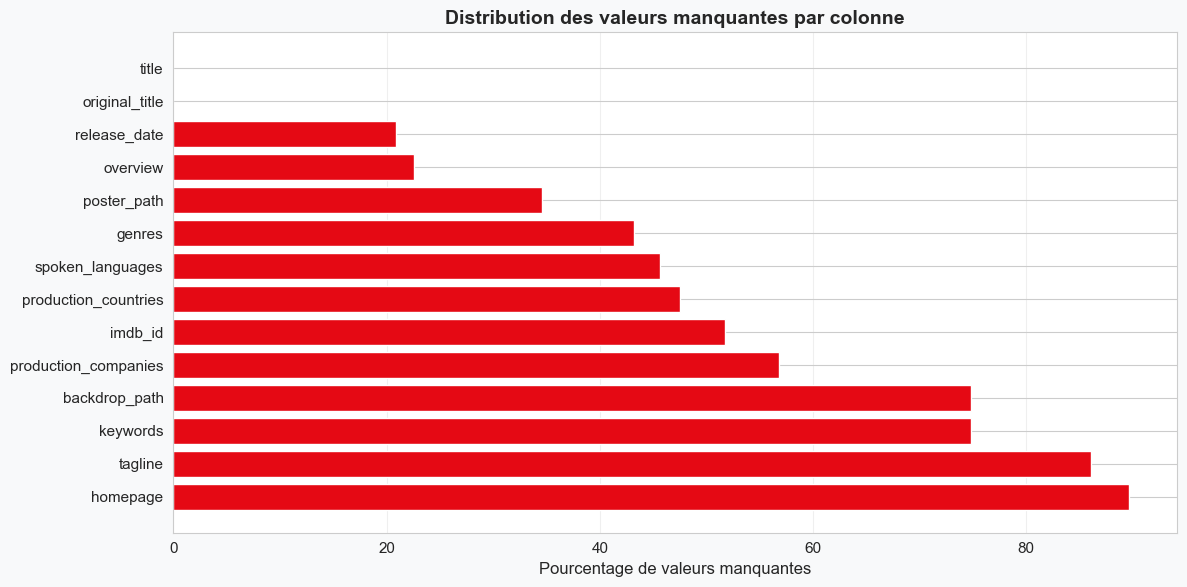

In [6]:
# Analyse des valeurs manquantes

print("="*80)
print("🔍 ANALYSE DES VALEURS MANQUANTES")
print("="*80)


missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100


missing_df = pd.DataFrame({
   'Colonne': missing.index,
   'Valeurs manquantes': missing.values,
   '% Manquant': missing_pct.values
})


missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values(
   '% Manquant', ascending=False
)


if len(missing_df) > 0:
   print(missing_df.to_string(index=False))


   # Visualiser les valeurs manquantes
   plt.figure(figsize=(12, 6))
   plt.barh(missing_df['Colonne'], missing_df['% Manquant'], color='#E50914')
   plt.xlabel('Pourcentage de valeurs manquantes', fontsize=12)
   plt.title('Distribution des valeurs manquantes par colonne',
             fontsize=14, fontweight='bold')
   plt.grid(axis='x', alpha=0.3)
   plt.tight_layout()
   plt.show()
else:
   print("✅ Aucune valeur manquante détectée !")


In [7]:
# Statistiques descriptives sur les colonnes numériques

print("="*80)
print("📊 STATISTIQUES DESCRIPTIVES - COLONNES NUMÉRIQUES")
print("="*80)


# Identifier les colonnes numériques pertinentes
numeric_cols = ['budget', 'revenue', 'runtime', 'popularity',
               'vote_average', 'vote_count']
numeric_cols = [col for col in numeric_cols if col in df.columns]


print(df[numeric_cols].describe().round(2))

📊 STATISTIQUES DESCRIPTIVES - COLONNES NUMÉRIQUES
            budget       revenue     runtime  popularity  vote_average  \
count    1353395.0  1.353395e+06  1353395.00  1353395.00    1353395.00   
mean      243503.9  6.324343e+05       44.77        1.06          1.62   
std      5133290.8  1.890076e+07       60.90        6.97          2.89   
min            0.0 -1.200000e+01      -28.00        0.00          0.00   
25%            0.0  0.000000e+00        0.00        0.60          0.00   
50%            0.0  0.000000e+00       17.00        0.60          0.00   
75%            0.0  0.000000e+00       86.00        0.77          2.30   
max    999999999.0  5.000000e+09    14400.00     2994.36         10.00   

       vote_count  
count  1353395.00  
mean        15.85  
std        291.97  
min          0.00  
25%          0.00  
50%          0.00  
75%          1.00  
max      34495.00  


In [8]:
# Stratégie de nettoyage

print("="*80)
print("🧹 STRATÉGIE DE NETTOYAGE COMPLÈTE")
print("="*80)

print("""
Étapes de nettoyage à appliquer :

1. ✅ Supprimer les doublons (basé sur title + release_date)
2. ✅ Filtrer uniquement les colonnes utiles (>50% remplies)
3. ✅ Filtrer les films sortis (status == 'Released')
4. ✅ Gérer les dates (convertir en datetime)
5. ✅ Filtrer la période d'analyse (1980-2025)
6. ✅ Ajuster les montants à l'inflation (base 2024)
7. ✅ Supprimer les films sans budget ou revenus (= 0 ou NaN)
8. ✅ Analyser vote_count après filtrage financier
9. ✅ Filtrer vote_count >= 20 (pour avoir des notes fiables)
10. ✅ Nettoyer runtime (30-300 min)
11. ✅ Extraire et nettoyer les genres, pays, studios
12. ✅ Créer les features calculées (ROI, profit, etc.)
13. ✅ Supprimer les lignes avec valeurs manquantes sur colonnes critiques
14. ❌ PAS de suppression d'outliers (on garde toutes les valeurs)
""")

# Copie de travail
df_clean = df.copy()
print(f"\n📊 Dataset initial : {len(df_clean):,} films")
print(f"📊 Colonnes initiales : {len(df_clean.columns)}")

🧹 STRATÉGIE DE NETTOYAGE COMPLÈTE

Étapes de nettoyage à appliquer :

1. ✅ Supprimer les doublons (basé sur title + release_date)
2. ✅ Filtrer uniquement les colonnes utiles (>50% remplies)
3. ✅ Filtrer les films sortis (status == 'Released')
4. ✅ Gérer les dates (convertir en datetime)
5. ✅ Filtrer la période d'analyse (1980-2025)
6. ✅ Ajuster les montants à l'inflation (base 2024)
7. ✅ Supprimer les films sans budget ou revenus (= 0 ou NaN)
8. ✅ Analyser vote_count après filtrage financier
9. ✅ Filtrer vote_count >= 20 (pour avoir des notes fiables)
10. ✅ Nettoyer runtime (30-300 min)
11. ✅ Extraire et nettoyer les genres, pays, studios
12. ✅ Créer les features calculées (ROI, profit, etc.)
13. ✅ Supprimer les lignes avec valeurs manquantes sur colonnes critiques
14. ❌ PAS de suppression d'outliers (on garde toutes les valeurs)


📊 Dataset initial : 1,353,395 films
📊 Colonnes initiales : 24


In [9]:
# Application du nettoyage 

print("\n" + "="*80)
print("🔄 APPLICATION DU NETTOYAGE")
print("="*80)

# ============================================
# 1. SUPPRIMER LES DOUBLONS
# ============================================
print(f"\n1️⃣ Suppression des doublons...")
print(f"   Avant : {len(df_clean):,} films")

# Identifier les doublons sur title + release_date
duplicates = df_clean.duplicated(subset=['title', 'release_date'], keep='first')
nb_duplicates = duplicates.sum()
print(f"   Doublons identifiés : {nb_duplicates:,}")

if nb_duplicates > 0:
    # Afficher quelques exemples de doublons
    print(f"\n   📋 Exemples de doublons détectés :")
    duplicate_examples = df_clean[duplicates][['title', 'release_date', 'budget', 'revenue']].head(5)
    print(duplicate_examples.to_string(index=False))
    
    # Supprimer les doublons
    df_clean = df_clean.drop_duplicates(subset=['title', 'release_date'], keep='first')
    print(f"\n   Après : {len(df_clean):,} films ✅")
else:
    print(f"   ✅ Aucun doublon détecté")

# ============================================
# 2. SÉLECTIONNER LES COLONNES UTILES (>50% remplies)
# ============================================
print(f"\n2️⃣ Sélection des colonnes pertinentes (>50% remplies)...")

# Colonnes essentielles pour l'analyse
colonnes_essentielles = [
    'id', 'title', 'original_title', 'original_language',
    'status', 'release_date',
    'budget', 'revenue', 'runtime',
    'vote_average', 'vote_count', 'popularity',
    'genres', 'production_companies', 'production_countries',
    'overview', 'poster_path', 'adult'
]

# Vérifier quelles colonnes existent et ont >50% de données
colonnes_disponibles = []
for col in colonnes_essentielles:
    if col in df_clean.columns:
        pct_rempli = (df_clean[col].notna().sum() / len(df_clean)) * 100
        if pct_rempli >= 50.0 or col in ['budget', 'revenue', 'status', 'release_date', 'runtime', 'vote_count']:
            colonnes_disponibles.append(col)
            print(f"   ✅ {col:25s} : {pct_rempli:5.1f}% rempli")
        else:
            print(f"   ❌ {col:25s} : {pct_rempli:5.1f}% rempli (exclu)")

df_clean = df_clean[colonnes_disponibles]
print(f"\n   📊 Colonnes conservées : {len(df_clean.columns)}")

# ============================================
# 3. FILTRER LES FILMS SORTIS
# ============================================
if 'status' in df_clean.columns:
    print(f"\n3️⃣ Filtrage par statut...")
    print(f"   Avant : {len(df_clean):,} films")
    print(f"   Statuts disponibles : {dict(df_clean['status'].value_counts())}")
    
    df_clean = df_clean[df_clean['status'] == 'Released']
    print(f"   Après : {len(df_clean):,} films ✅")

# ============================================
# 4. GÉRER LES DATES
# ============================================
if 'release_date' in df_clean.columns:
    print(f"\n4️⃣ Traitement des dates...")
    
    # Convertir en datetime
    df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], errors='coerce')
    
    # Extraire année, mois, trimestre
    df_clean['release_year'] = df_clean['release_date'].dt.year
    df_clean['release_month'] = df_clean['release_date'].dt.month
    df_clean['release_quarter'] = df_clean['release_date'].dt.quarter
    df_clean['release_day_of_week'] = df_clean['release_date'].dt.dayofweek
    
    # Supprimer les dates invalides
    avant = len(df_clean)
    df_clean = df_clean[df_clean['release_year'].notna()]
    print(f"   Dates extraites : year, month, quarter, day_of_week ✅")
    print(f"   Dates invalides supprimées : {avant - len(df_clean):,}")

# ============================================
# 5. FILTRER PÉRIODE 1980-2025
# ============================================
if 'release_year' in df_clean.columns:
    print(f"\n5️⃣ Filtrage période 1980-2025...")
    print(f"   Avant : {len(df_clean):,} films")
    print(f"   Période actuelle : {int(df_clean['release_year'].min())} - {int(df_clean['release_year'].max())}")
    
    df_clean = df_clean[
        (df_clean['release_year'] >= 1980) & 
        (df_clean['release_year'] <= 2025)
    ]
    print(f"   Après : {len(df_clean):,} films ✅")
    print(f"   Nouvelle période : {int(df_clean['release_year'].min())} - {int(df_clean['release_year'].max())}")

# ============================================
# 6. AJUSTER LES MONTANTS À L'INFLATION (BASE 2024)
# ============================================
print(f"\n6️⃣ Ajustement à l'inflation (base 2024)...")

# Coefficients d'inflation (CPI US - Consumer Price Index)
inflation_factors = {
    1980: 3.43, 1981: 3.18, 1982: 2.97, 1983: 2.88, 1984: 2.76,
    1985: 2.66, 1986: 2.62, 1987: 2.53, 1988: 2.43, 1989: 2.32,
    1990: 2.20, 1991: 2.10, 1992: 2.03, 1993: 1.97, 1994: 1.91,
    1995: 1.86, 1996: 1.80, 1997: 1.76, 1998: 1.73, 1999: 1.69,
    2000: 1.63, 2001: 1.58, 2002: 1.55, 2003: 1.51, 2004: 1.47,
    2005: 1.42, 2006: 1.37, 2007: 1.33, 2008: 1.28, 2009: 1.28,
    2010: 1.26, 2011: 1.22, 2012: 1.19, 2013: 1.17, 2014: 1.15,
    2015: 1.15, 2016: 1.14, 2017: 1.11, 2018: 1.09, 2019: 1.07,
    2020: 1.05, 2021: 1.01, 2022: 0.93, 2023: 0.87, 2024: 1.00, 2025: 1.00
}

# Fonction pour ajuster à l'inflation
def adjust_for_inflation(row):
    year = row['release_year']
    if pd.notna(year) and year in inflation_factors:
        factor = inflation_factors[int(year)]
        return row['budget'] * factor, row['revenue'] * factor
    return row['budget'], row['revenue']

# Sauvegarder les montants originaux
df_clean['budget_original'] = df_clean['budget']
df_clean['revenue_original'] = df_clean['revenue']

print(f"   Exemple AVANT ajustement :")
exemple = df_clean[df_clean['release_year'] == 1990].iloc[0] if len(df_clean[df_clean['release_year'] == 1990]) > 0 else None
if exemple is not None:
    print(f"   Film de 1990 : Budget = ${exemple['budget']:,.0f}")

# Appliquer l'ajustement
if 'release_year' in df_clean.columns:
    df_clean[['budget', 'revenue']] = df_clean.apply(
        adjust_for_inflation, axis=1, result_type='expand'
    )
    print(f"   ✅ Ajustement appliqué avec succès")
    
    if exemple is not None:
        exemple_apres = df_clean[df_clean['release_year'] == 1990].iloc[0]
        print(f"   Exemple APRÈS ajustement :")
        print(f"   Film de 1990 : Budget ajusté = ${exemple_apres['budget']:,.0f} (x{inflation_factors[1990]})")
    
    print(f"\n   💡 Tous les montants sont maintenant en dollars 2024")

# ============================================
# 7. FILTRER BUDGET ET REVENUS VALIDES
# ============================================
if 'budget' in df_clean.columns and 'revenue' in df_clean.columns:
    print(f"\n7️⃣ Filtrage budget et revenus...")
    print(f"   Avant : {len(df_clean):,} films")
    
    print(f"\n   📊 Statistiques AVANT filtrage :")
    print(f"      Budget = 0 : {(df_clean['budget'] == 0).sum():,} films")
    print(f"      Revenue = 0 : {(df_clean['revenue'] == 0).sum():,} films")
    print(f"      Budget max : ${df_clean['budget'].max():,.0f}")
    print(f"      Revenue max : ${df_clean['revenue'].max():,.0f}")
    
    df_clean = df_clean[
        (df_clean['budget'] > 0) & 
        (df_clean['revenue'] > 0) &
        (df_clean['budget'].notna()) &
        (df_clean['revenue'].notna())
    ]
    print(f"\n   Après : {len(df_clean):,} films ✅")
    
    print(f"\n   📊 Statistiques APRÈS filtrage :")
    print(f"      Budget min : ${df_clean['budget'].min():,.0f}")
    print(f"      Budget médian : ${df_clean['budget'].median():,.0f}")
    print(f"      Budget max : ${df_clean['budget'].max():,.0f}")
    print(f"      Revenue min : ${df_clean['revenue'].min():,.0f}")
    print(f"      Revenue médian : ${df_clean['revenue'].median():,.0f}")
    print(f"      Revenue max : ${df_clean['revenue'].max():,.0f}")
    print(f"\n   ⚠️  Aucun outlier supprimé - toutes les valeurs conservées")

# ============================================
# 8. ANALYSER vote_count APRÈS FILTRAGE FINANCIER
# ============================================
if 'vote_count' in df_clean.columns:
    print(f"\n8️⃣ Analyse de vote_count sur les films avec données financières...")
    print(f"   Films restants : {len(df_clean):,}")
    
    print(f"\n   📊 STATISTIQUES DESCRIPTIVES vote_count :")
    print("   " + "="*60)
    vote_stats = df_clean['vote_count'].describe()
    print(vote_stats.to_string())
    
    print(f"\n   📊 DISTRIBUTION vote_count :")
    print(f"      vote_count = 0        : {(df_clean['vote_count'] == 0).sum():,} films ({(df_clean['vote_count'] == 0).sum() / len(df_clean) * 100:.1f}%)")
    print(f"      vote_count < 10       : {(df_clean['vote_count'] < 10).sum():,} films ({(df_clean['vote_count'] < 10).sum() / len(df_clean) * 100:.1f}%)")
    print(f"      vote_count < 20       : {(df_clean['vote_count'] < 20).sum():,} films ({(df_clean['vote_count'] < 20).sum() / len(df_clean) * 100:.1f}%)")
    print(f"      vote_count < 50       : {(df_clean['vote_count'] < 50).sum():,} films ({(df_clean['vote_count'] < 50).sum() / len(df_clean) * 100:.1f}%)")
    print(f"      vote_count < 100      : {(df_clean['vote_count'] < 100).sum():,} films ({(df_clean['vote_count'] < 100).sum() / len(df_clean) * 100:.1f}%)")
    print(f"      vote_count >= 20      : {(df_clean['vote_count'] >= 20).sum():,} films ({(df_clean['vote_count'] >= 20).sum() / len(df_clean) * 100:.1f}%)")
    
    print(f"\n   📊 QUARTILES :")
    print(f"      25% des films ont < {df_clean['vote_count'].quantile(0.25):.0f} votes")
    print(f"      50% des films ont < {df_clean['vote_count'].quantile(0.50):.0f} votes (médiane)")
    print(f"      75% des films ont < {df_clean['vote_count'].quantile(0.75):.0f} votes")
    print(f"      95% des films ont < {df_clean['vote_count'].quantile(0.95):.0f} votes")
    
    # Visualisation simple en texte
    print(f"\n   📊 VISUALISATION (distribution par tranches) :")
    bins = [0, 10, 20, 50, 100, 500, 1000, 5000, df_clean['vote_count'].max()]
    bin_labels = ['0-9', '10-19', '20-49', '50-99', '100-499', '500-999', '1000-4999', '5000+']
    
    for i in range(len(bins)-1):
        count = ((df_clean['vote_count'] >= bins[i]) & (df_clean['vote_count'] < bins[i+1])).sum()
        pct = (count / len(df_clean)) * 100
        bar = '█' * int(pct / 2)  # Chaque █ = 2%
        print(f"      {bin_labels[i]:10s} : {count:6,} films ({pct:5.1f}%) {bar}")

# ============================================
# 9. FILTRER vote_count >= 20
# ============================================
if 'vote_count' in df_clean.columns:
    print(f"\n9️⃣ Filtrage vote_count >= 20 (notes fiables)...")
    
    films_avant = len(df_clean)
    
    # Statistiques sur ce qu'on va perdre
    films_perdus = df_clean[df_clean['vote_count'] < 20]
    print(f"\n   📊 Analyse des films qui seront supprimés (vote_count < 20) :")
    print(f"      Nombre : {len(films_perdus):,} films")
    if len(films_perdus) > 0:
        print(f"      Budget moyen : ${films_perdus['budget'].mean():,.0f}")
        print(f"      Revenue moyen : ${films_perdus['revenue'].mean():,.0f}")
        
        if 'vote_average' in df_clean.columns:
            print(f"      Note moyenne : {films_perdus['vote_average'].mean():.2f}/10")
    
    # Appliquer le filtre
    df_clean = df_clean[df_clean['vote_count'] >= 20]
    
    print(f"\n   Avant : {films_avant:,} films")
    print(f"   Après : {len(df_clean):,} films ✅")
    print(f"   Films supprimés : {len(films_perdus):,} ({(len(films_perdus) / films_avant * 100):.1f}%)")
    
    print(f"\n   💡 JUSTIFICATION :")
    print(f"      - Films avec < 20 votes = échantillon trop petit")
    print(f"      - Notes peu représentatives de la qualité réelle")
    print(f"      - Souvent des films ultra-confidentiels ou non distribués")
    print(f"      - Améliore la fiabilité des corrélations avec vote_average")
    
    print(f"\n   📊 Statistiques finales vote_count :")
    print(f"      Min : {df_clean['vote_count'].min():.0f}")
    print(f"      Médiane : {df_clean['vote_count'].median():.0f}")
    print(f"      Moyenne : {df_clean['vote_count'].mean():.0f}")
    print(f"      Max : {df_clean['vote_count'].max():.0f}")

# ============================================
# 10. NETTOYER RUNTIME
# ============================================
if 'runtime' in df_clean.columns:
    print(f"\n🔟 Nettoyage de la durée...")
    print(f"   Avant : {len(df_clean):,} films")
    print(f"   Runtime min : {df_clean['runtime'].min()} min")
    print(f"   Runtime max : {df_clean['runtime'].max()} min")
    
    # Distribution runtime
    print(f"\n   📊 Distribution runtime :")
    print(f"      < 30 min : {(df_clean['runtime'] < 30).sum():,} films")
    print(f"      30-60 min : {((df_clean['runtime'] >= 30) & (df_clean['runtime'] < 60)).sum():,} films")
    print(f"      60-90 min : {((df_clean['runtime'] >= 60) & (df_clean['runtime'] < 90)).sum():,} films")
    print(f"      90-120 min : {((df_clean['runtime'] >= 90) & (df_clean['runtime'] < 120)).sum():,} films")
    print(f"      120-180 min : {((df_clean['runtime'] >= 120) & (df_clean['runtime'] < 180)).sum():,} films")
    print(f"      180-300 min : {((df_clean['runtime'] >= 180) & (df_clean['runtime'] <= 300)).sum():,} films")
    print(f"      > 300 min : {(df_clean['runtime'] > 300).sum():,} films")
    
    # Filtrer
    df_clean = df_clean[
        (df_clean['runtime'] > 30) & 
        (df_clean['runtime'] <= 300)
    ]
    print(f"\n   Après : {len(df_clean):,} films ✅")
    print(f"   Nouvelle plage : {df_clean['runtime'].min():.0f}-{df_clean['runtime'].max():.0f} min")

print(f"\n{'='*80}")
print(f"✅ NETTOYAGE INITIAL TERMINÉ : {len(df_clean):,} films")
print(f"📉 Réduction totale depuis le début : {len(df) - len(df_clean):,} films ({((len(df) - len(df_clean)) / len(df) * 100):.1f}%)")


🔄 APPLICATION DU NETTOYAGE

1️⃣ Suppression des doublons...
   Avant : 1,353,395 films
   Doublons identifiés : 25,727

   📋 Exemples de doublons détectés :
   title release_date  budget  revenue
  Return          NaN       0        0
    Eden   2014-11-19 2300000        0
The Trip   2021-07-30       0        0
     Box          NaN       0        0
     RED          NaN       0        0

   Après : 1,327,668 films ✅

2️⃣ Sélection des colonnes pertinentes (>50% remplies)...
   ✅ id                        : 100.0% rempli
   ✅ title                     : 100.0% rempli
   ✅ original_title            : 100.0% rempli
   ✅ original_language         : 100.0% rempli
   ✅ status                    : 100.0% rempli
   ✅ release_date              :  80.4% rempli
   ✅ budget                    : 100.0% rempli
   ✅ revenue                   : 100.0% rempli
   ✅ runtime                   : 100.0% rempli
   ✅ vote_average              : 100.0% rempli
   ✅ vote_count                : 100.0% rempli
  

In [13]:
#Inspecter le format des genres et pays

print("\n" + "="*80)
print("🔍 INSPECTION DU FORMAT DES DONNÉES GENRES ET PAYS")
print("="*80)

# Inspecter les genres
if 'genres' in df_clean.columns:
    print("\n📋 EXEMPLES DE FORMATS GENRES :")
    print("="*60)
    
    # Prendre 5 exemples non-nuls
    exemples_genres = df_clean[df_clean['genres'].notna()]['genres'].head(5)
    
    for i, genre_data in enumerate(exemples_genres, 1):
        print(f"\nExemple {i} :")
        print(f"Type : {type(genre_data)}")
        print(f"Contenu : {str(genre_data)[:200]}...")  # Afficher les 200 premiers caractères
        print(f"Longueur : {len(str(genre_data))} caractères")

# Inspecter les pays
if 'production_countries' in df_clean.columns:
    print("\n\n📋 EXEMPLES DE FORMATS PRODUCTION_COUNTRIES :")
    print("="*60)
    
    # Prendre 5 exemples non-nuls
    exemples_pays = df_clean[df_clean['production_countries'].notna()]['production_countries'].head(5)
    
    for i, pays_data in enumerate(exemples_pays, 1):
        print(f"\nExemple {i} :")
        print(f"Type : {type(pays_data)}")
        print(f"Contenu : {str(pays_data)[:200]}...")
        print(f"Longueur : {len(str(pays_data))} caractères")

# Inspecter les studios
if 'production_companies' in df_clean.columns:
    print("\n\n📋 EXEMPLES DE FORMATS PRODUCTION_COMPANIES :")
    print("="*60)
    
    # Prendre 5 exemples non-nuls
    exemples_studios = df_clean[df_clean['production_companies'].notna()]['production_companies'].head(5)
    
    for i, studio_data in enumerate(exemples_studios, 1):
        print(f"\nExemple {i} :")
        print(f"Type : {type(studio_data)}")
        print(f"Contenu : {str(studio_data)[:200]}...")
        print(f"Longueur : {len(str(studio_data))} caractères")


🔍 INSPECTION DU FORMAT DES DONNÉES GENRES ET PAYS

📋 EXEMPLES DE FORMATS GENRES :

Exemple 1 :
Type : <class 'str'>
Contenu : Action, Science Fiction, Adventure...
Longueur : 34 caractères

Exemple 2 :
Type : <class 'str'>
Contenu : Adventure, Drama, Science Fiction...
Longueur : 33 caractères

Exemple 3 :
Type : <class 'str'>
Contenu : Drama, Action, Crime, Thriller...
Longueur : 30 caractères

Exemple 4 :
Type : <class 'str'>
Contenu : Action, Adventure, Fantasy, Science Fiction...
Longueur : 43 caractères

Exemple 5 :
Type : <class 'str'>
Contenu : Science Fiction, Action, Adventure...
Longueur : 34 caractères


📋 EXEMPLES DE FORMATS PRODUCTION_COUNTRIES :

Exemple 1 :
Type : <class 'str'>
Contenu : United Kingdom, United States of America...
Longueur : 40 caractères

Exemple 2 :
Type : <class 'str'>
Contenu : United Kingdom, United States of America...
Longueur : 40 caractères

Exemple 3 :
Type : <class 'str'>
Contenu : United Kingdom, United States of America...
Longueur : 40 car

In [14]:
# Feature Engineering

print("\n" + "="*80)
print("🔧 FEATURE ENGINEERING")
print("="*80)

# 1. Features financières
print("\n1️⃣ Création des features financières...")
df_clean['profit'] = df_clean['revenue'] - df_clean['budget']
df_clean['roi'] = (df_clean['revenue'] - df_clean['budget']) / df_clean['budget']
df_clean['profit_margin'] = (df_clean['profit'] / df_clean['revenue']) * 100
df_clean['is_profitable'] = (df_clean['profit'] > 0).astype(int)

# Convertir en millions pour lisibilité
df_clean['budget_million'] = df_clean['budget'] / 1_000_000
df_clean['revenue_million'] = df_clean['revenue'] / 1_000_000
df_clean['profit_million'] = df_clean['profit'] / 1_000_000

print("   ✅ profit, roi, profit_margin, is_profitable")
print("   ✅ budget_million, revenue_million, profit_million")

print("\n   💡 NOTE IMPORTANTE : Tous les montants (budget, revenue, profit) sont ajustés à l'inflation (base 2024)")
print(f"      Les colonnes 'budget_original' et 'revenue_original' contiennent les montants nominaux")

# 2. Catégories de budget
print("\n2️⃣ Création des catégories de budget...")
def categorize_budget(budget_million):
    if budget_million < 10:
        return 'Petit (<10M)'
    elif budget_million < 50:
        return 'Moyen (10-50M)'
    elif budget_million < 100:
        return 'Gros (50-100M)'
    else:
        return 'Blockbuster (>100M)'

df_clean['budget_category'] = df_clean['budget_million'].apply(categorize_budget)
print(f"   ✅ budget_category créée")
print(f"\n   Distribution des catégories :")
for cat, count in df_clean['budget_category'].value_counts().items():
    pct = (count / len(df_clean)) * 100
    print(f"      - {cat:20s} : {count:6,} films ({pct:5.1f}%)")

# 3. Extraire le genre principal (FORMAT : "Action, Science Fiction, Adventure")
if 'genres' in df_clean.columns:
    print("\n3️⃣ Extraction du genre principal...")
    
    def extract_first_genre(genres_str):
        """Extrait le premier genre d'une chaîne séparée par des virgules"""
        if pd.isna(genres_str) or genres_str == '' or genres_str == '[]':
            return 'Unknown'
        
        # Nettoyer et extraire le premier élément
        genres_str = str(genres_str).strip()
        
        # Si c'est une liste vide ou juste des espaces
        if not genres_str or genres_str == '[]':
            return 'Unknown'
        
        # Séparer par virgule et prendre le premier
        parts = genres_str.split(',')
        if len(parts) > 0:
            first_genre = parts[0].strip()
            if first_genre and first_genre != '[]' and first_genre != '':
                return first_genre
        
        return 'Unknown'
    
    df_clean['main_genre'] = df_clean['genres'].apply(extract_first_genre)
    
    # Compter les Unknown pour diagnostic
    nb_unknown = (df_clean['main_genre'] == 'Unknown').sum()
    print(f"   ✅ main_genre ({df_clean['main_genre'].nunique()} genres uniques)")
    print(f"   ⚠️  Films sans genre : {nb_unknown:,} ({(nb_unknown/len(df_clean)*100):.1f}%)")
    
    print(f"\n   Top 10 genres :")
    for genre, count in df_clean['main_genre'].value_counts().head(10).items():
        pct = (count / len(df_clean)) * 100
        print(f"      - {genre:20s} : {count:6,} films ({pct:5.1f}%)")

# 4. Extraire le pays principal (FORMAT : "United Kingdom, United States of America")
if 'production_countries' in df_clean.columns:
    print("\n4️⃣ Extraction du pays principal...")
    
    def extract_first_country(countries_str):
        """Extrait le premier pays d'une chaîne séparée par des virgules"""
        if pd.isna(countries_str) or countries_str == '' or countries_str == '[]':
            return 'Unknown'
        
        # Nettoyer et extraire le premier élément
        countries_str = str(countries_str).strip()
        
        # Si c'est une liste vide ou juste des espaces
        if not countries_str or countries_str == '[]':
            return 'Unknown'
        
        # Séparer par virgule et prendre le premier
        parts = countries_str.split(',')
        if len(parts) > 0:
            first_country = parts[0].strip()
            if first_country and first_country != '[]' and first_country != '':
                # Convertir les noms longs en codes ISO si possible
                country_mapping = {
                    'United States of America': 'US',
                    'United Kingdom': 'GB',
                    'France': 'FR',
                    'Germany': 'DE',
                    'Italy': 'IT',
                    'Spain': 'ES',
                    'Canada': 'CA',
                    'Japan': 'JP',
                    'South Korea': 'KR',
                    'China': 'CN',
                    'India': 'IN',
                    'Australia': 'AU',
                    'Brazil': 'BR',
                    'Mexico': 'MX',
                    'Russia': 'RU'
                }
                return country_mapping.get(first_country, first_country)
        
        return 'Unknown'
    
    df_clean['main_country'] = df_clean['production_countries'].apply(extract_first_country)
    
    # Compter les Unknown pour diagnostic
    nb_unknown = (df_clean['main_country'] == 'Unknown').sum()
    print(f"   ✅ main_country ({df_clean['main_country'].nunique()} pays)")
    print(f"   ⚠️  Films sans pays : {nb_unknown:,} ({(nb_unknown/len(df_clean)*100):.1f}%)")
    
    print(f"\n   Top 10 pays :")
    for country, count in df_clean['main_country'].value_counts().head(10).items():
        pct = (count / len(df_clean)) * 100
        print(f"      - {country:10s} : {count:6,} films ({pct:5.1f}%)")

# 5. Extraire le studio principal (FORMAT similaire)
if 'production_companies' in df_clean.columns:
    print("\n5️⃣ Extraction du studio principal...")
    
    def extract_first_company(companies_str):
        """Extrait le premier studio d'une chaîne séparée par des virgules"""
        if pd.isna(companies_str) or companies_str == '' or companies_str == '[]':
            return 'Unknown'
        
        # Nettoyer et extraire le premier élément
        companies_str = str(companies_str).strip()
        
        # Si c'est une liste vide ou juste des espaces
        if not companies_str or companies_str == '[]':
            return 'Unknown'
        
        # Séparer par virgule et prendre le premier
        parts = companies_str.split(',')
        if len(parts) > 0:
            first_company = parts[0].strip()
            if first_company and first_company != '[]' and first_company != '':
                return first_company
        
        return 'Unknown'
    
    df_clean['main_studio'] = df_clean['production_companies'].apply(extract_first_company)
    
    # Compter les Unknown pour diagnostic
    nb_unknown = (df_clean['main_studio'] == 'Unknown').sum()
    print(f"   ✅ main_studio ({df_clean['main_studio'].nunique()} studios)")
    print(f"   ⚠️  Films sans studio : {nb_unknown:,} ({(nb_unknown/len(df_clean)*100):.1f}%)")
    
    print(f"\n   Top 10 studios :")
    for studio, count in df_clean['main_studio'].value_counts().head(10).items():
        pct = (count / len(df_clean)) * 100
        print(f"      - {studio[:30]:30s} : {count:5,} films ({pct:5.1f}%)")

# 6. Catégories de décennies
print("\n6️⃣ Création des décennies...")
df_clean['decade'] = (df_clean['release_year'] // 10) * 10
print(f"   ✅ decade créée")
print(f"\n   Distribution par décennie :")
for decade, count in sorted(df_clean['decade'].value_counts().items()):
    pct = (count / len(df_clean)) * 100
    print(f"      - {int(decade)}s : {count:6,} films ({pct:5.1f}%)")

# 7. Saisons
print("\n7️⃣ Création des saisons...")
def get_season(month):
    if pd.isna(month):
        return 'Unknown'
    if month in [12, 1, 2]:
        return 'Hiver'
    elif month in [3, 4, 5]:
        return 'Printemps'
    elif month in [6, 7, 8]:
        return 'Été'
    else:
        return 'Automne'

df_clean['season'] = df_clean['release_month'].apply(get_season)
print(f"   ✅ season créée")
print(f"\n   Distribution par saison :")
for season, count in df_clean['season'].value_counts().items():
    pct = (count / len(df_clean)) * 100
    print(f"      - {season:12s} : {count:6,} films ({pct:5.1f}%)")

print(f"\n{'='*80}")
print("✅ FEATURE ENGINEERING TERMINÉ")
print(f"📊 Nouvelles colonnes créées : {len(df_clean.columns) - len(df.columns)}")


🔧 FEATURE ENGINEERING

1️⃣ Création des features financières...
   ✅ profit, roi, profit_margin, is_profitable
   ✅ budget_million, revenue_million, profit_million

   💡 NOTE IMPORTANTE : Tous les montants (budget, revenue, profit) sont ajustés à l'inflation (base 2024)
      Les colonnes 'budget_original' et 'revenue_original' contiennent les montants nominaux

2️⃣ Création des catégories de budget...
   ✅ budget_category créée

   Distribution des catégories :
      - Moyen (10-50M)       :  3,362 films ( 44.1%)
      - Petit (<10M)         :  2,195 films ( 28.8%)
      - Gros (50-100M)       :  1,198 films ( 15.7%)
      - Blockbuster (>100M)  :    877 films ( 11.5%)

3️⃣ Extraction du genre principal...
   ✅ main_genre (20 genres uniques)
   ⚠️  Films sans genre : 1 (0.0%)

   Top 10 genres :
      - Drama                :  1,714 films ( 22.5%)
      - Comedy               :  1,666 films ( 21.8%)
      - Action               :  1,211 films ( 15.9%)
      - Horror               :  

In [15]:
# Supprimer les lignes avec données manquantes critiques

print("\n" + "="*80)
print("🧹 SUPPRESSION DES LIGNES AVEC DONNÉES MANQUANTES CRITIQUES")
print("="*80)


print(f"\n📊 Avant suppression : {len(df_clean):,} films")


# Colonnes critiques qui doivent être complètes
colonnes_critiques = [
   'budget', 'revenue', 'runtime', 'release_year', 'release_month',
   'budget_million', 'revenue_million', 'roi', 'profit', 'is_profitable',
   'main_genre', 'main_country', 'budget_category', 'decade'
]


# Vérifier quelles colonnes existent
colonnes_critiques = [col for col in colonnes_critiques if col in df_clean.columns]


print(f"\n🔍 Colonnes critiques vérifiées :")
for col in colonnes_critiques:
   nb_missing = df_clean[col].isna().sum()
   if nb_missing > 0:
       print(f"   ⚠️  {col:25s} : {nb_missing:,} valeurs manquantes")
   else:
       print(f"   ✅ {col:25s} : complet")


# Supprimer les lignes avec au moins une valeur manquante sur ces colonnes
df_clean = df_clean.dropna(subset=colonnes_critiques)


print(f"\n📊 Après suppression : {len(df_clean):,} films ✅")
print(f"📉 Films supprimés : {len(df) - len(df_clean):,}")


# Vérification finale
print(f"\n🔍 Vérification finale des valeurs manquantes :")
missing_final = df_clean[colonnes_critiques].isna().sum()
if missing_final.sum() == 0:
   print("   ✅ Toutes les colonnes critiques sont complètes !")
else:
   print(f"   ⚠️  Il reste {missing_final.sum()} valeurs manquantes")
   print(missing_final[missing_final > 0])


🧹 SUPPRESSION DES LIGNES AVEC DONNÉES MANQUANTES CRITIQUES

📊 Avant suppression : 7,632 films

🔍 Colonnes critiques vérifiées :
   ✅ budget                    : complet
   ✅ revenue                   : complet
   ✅ runtime                   : complet
   ✅ release_year              : complet
   ✅ release_month             : complet
   ✅ budget_million            : complet
   ✅ revenue_million           : complet
   ✅ roi                       : complet
   ✅ profit                    : complet
   ✅ is_profitable             : complet
   ✅ main_genre                : complet
   ✅ main_country              : complet
   ✅ budget_category           : complet
   ✅ decade                    : complet

📊 Après suppression : 7,632 films ✅
📉 Films supprimés : 1,345,763

🔍 Vérification finale des valeurs manquantes :
   ✅ Toutes les colonnes critiques sont complètes !


In [16]:
# Statistiques finales

print("\n" + "="*80)
print("📊 STATISTIQUES FINALES DU DATASET NETTOYÉ")
print("="*80)

print(f"\n🎬 FILMS")
print(f"   Total : {len(df_clean):,} films")
print(f"   Période : {int(df_clean['release_year'].min())} - {int(df_clean['release_year'].max())}")
print(f"   Décennies : {sorted(df_clean['decade'].unique())}")

print(f"\n💰 FINANCES (ajustées inflation 2024, sans suppression d'outliers)")
print(f"   Budget min : ${df_clean['budget_million'].min():.2f}M")
print(f"   Budget médian : ${df_clean['budget_million'].median():.2f}M")
print(f"   Budget moyen : ${df_clean['budget_million'].mean():.2f}M")
print(f"   Budget max : ${df_clean['budget_million'].max():.2f}M")
print(f"\n   Revenue min : ${df_clean['revenue_million'].min():.2f}M")
print(f"   Revenue médian : ${df_clean['revenue_million'].median():.2f}M")
print(f"   Revenue moyen : ${df_clean['revenue_million'].mean():.2f}M")
print(f"   Revenue max : ${df_clean['revenue_million'].max():.2f}M")

print(f"\n📈 RENTABILITÉ")
profitable_count = df_clean['is_profitable'].sum()
profitable_pct = (profitable_count / len(df_clean)) * 100
print(f"   Films rentables : {profitable_count:,} ({profitable_pct:.1f}%)")
print(f"   Films non rentables : {len(df_clean) - profitable_count:,} ({100-profitable_pct:.1f}%)")
print(f"   ROI min : {df_clean['roi'].min():.2f}")
print(f"   ROI médian : {df_clean['roi'].median():.2f}")
print(f"   ROI moyen : {df_clean['roi'].mean():.2f}")
print(f"   ROI max : {df_clean['roi'].max():.2f}")

print(f"\n🎭 GENRES")
print(f"   Nombre de genres : {df_clean['main_genre'].nunique()}")
print(f"   Top 5 genres :")
for genre, count in df_clean['main_genre'].value_counts().head().items():
    pct = (count / len(df_clean)) * 100
    print(f"      - {genre}: {count:,} films ({pct:.1f}%)")

print(f"\n🌍 PAYS")
print(f"   Nombre de pays : {df_clean['main_country'].nunique()}")
print(f"   Top 5 pays :")
for country, count in df_clean['main_country'].value_counts().head().items():
    pct = (count / len(df_clean)) * 100
    print(f"      - {country}: {count:,} films ({pct:.1f}%)")

if 'main_studio' in df_clean.columns:
    print(f"\n🏢 STUDIOS")
    print(f"   Nombre de studios : {df_clean['main_studio'].nunique()}")
    print(f"   Top 5 studios :")
    for studio, count in df_clean['main_studio'].value_counts().head().items():
        pct = (count / len(df_clean)) * 100
        print(f"      - {studio}: {count:,} films ({pct:.1f}%)")

print(f"\n📊 QUALITÉ DES DONNÉES")
print(f"   Vote count min : {df_clean['vote_count'].min():.0f}")
print(f"   Vote count médian : {df_clean['vote_count'].median():.0f}")
print(f"   Vote count moyen : {df_clean['vote_count'].mean():.0f}")
print(f"   Vote count max : {df_clean['vote_count'].max():.0f}")

if 'vote_average' in df_clean.columns:
    print(f"\n   Vote average min : {df_clean['vote_average'].min():.1f}")
    print(f"   Vote average médian : {df_clean['vote_average'].median():.1f}")
    print(f"   Vote average moyen : {df_clean['vote_average'].mean():.1f}")
    print(f"   Vote average max : {df_clean['vote_average'].max():.1f}")

print(f"\n💡 NOTES IMPORTANTES :")
print(f"   ✅ Tous les films ont au moins 20 votes (notes fiables)")
print(f"   ✅ Tous les montants sont en dollars 2024 (ajustés à l'inflation)")
print(f"   ✅ Aucun outlier financier supprimé (données réelles conservées)")

# Comparer budget original vs ajusté
if 'budget_original' in df_clean.columns:
    print(f"\n📊 IMPACT DE L'AJUSTEMENT À L'INFLATION")
    
    # Film des années 1980
    film_1980 = df_clean[df_clean['release_year'] == 1980].iloc[0] if len(df_clean[df_clean['release_year'] == 1980]) > 0 else None
    if film_1980 is not None:
        print(f"   Exemple film 1980 :")
        print(f"      Budget original : ${film_1980['budget_original']:,.0f}")
        print(f"      Budget ajusté 2024 : ${film_1980['budget']:,.0f}")
        print(f"      Facteur : x{(film_1980['budget'] / film_1980['budget_original']):.2f}")
    
    # Film des années 2020
    film_2020 = df_clean[df_clean['release_year'] == 2020].iloc[0] if len(df_clean[df_clean['release_year'] == 2020]) > 0 else None
    if film_2020 is not None:
        print(f"\n   Exemple film 2020 :")
        print(f"      Budget original : ${film_2020['budget_original']:,.0f}")
        print(f"      Budget ajusté 2024 : ${film_2020['budget']:,.0f}")
        print(f"      Facteur : x{(film_2020['budget'] / film_2020['budget_original']):.2f}")

# Sauvegarder le dataset nettoyé
output_path = '../data/processed/movies_clean.csv'
df_clean.to_csv(output_path, index=False)
print(f"\n{'='*80}")
print(f"💾 DATASET SAUVEGARDÉ : {output_path}")
print(f"📊 Taille du fichier : {os.path.getsize(output_path) / (1024**2):.2f} MB")
print(f"✅ NETTOYAGE TERMINÉ - Dataset prêt pour l'analyse !")


📊 STATISTIQUES FINALES DU DATASET NETTOYÉ

🎬 FILMS
   Total : 7,632 films
   Période : 1980 - 2023
   Décennies : [np.float64(1980.0), np.float64(1990.0), np.float64(2000.0), np.float64(2010.0), np.float64(2020.0)]

💰 FINANCES (ajustées inflation 2024, sans suppression d'outliers)
   Budget min : $0.00M
   Budget médian : $23.70M
   Budget moyen : $42.14M
   Budget max : $462.38M

   Revenue min : $0.00M
   Revenue médian : $34.77M
   Revenue moyen : $116.67M
   Revenue max : $3984.93M

📈 RENTABILITÉ
   Films rentables : 4,935 (64.7%)
   Films non rentables : 2,697 (35.3%)
   ROI min : -1.00
   ROI médian : 0.73
   ROI moyen : 381.25
   ROI max : 1545928.91

🎭 GENRES
   Nombre de genres : 20
   Top 5 genres :
      - Drama: 1,714 films (22.5%)
      - Comedy: 1,666 films (21.8%)
      - Action: 1,211 films (15.9%)
      - Horror: 539 films (7.1%)
      - Adventure: 444 films (5.8%)

🌍 PAYS
   Nombre de pays : 80
   Top 5 pays :
      - US: 4,175 films (54.7%)
      - GB: 488 films (6.